# **Advanced AI Coursework**
*B716460*

Aims for this report:
* Results from a range of different parameters
  * Results from a range of varying epochs for its training process.
  * Adjustments to its given optimiser, such as; choice of optimisers and its given adjustments e.g., learning rate.
* Implementation of a Convolutional Neural Network.
* Implementation of a Recurring Neural Network.
* Produce varying comparisons of the two architectures and how they differ.

## **Dataset Generation**

Get the CIFAR-10 dataset from the Keras API, and convert the downloaded dataset labels to a binary class matrix for faster processing.

Where it states; 
```python
(training_images, training_labels),(testing_images, testing_labels) = mnist.load_data()
```
All necessary testing and training images, along with their associated labels to represent its particular class. In this case there are 10 classes used for image classification.

Once the builtin MNIST dataloader has been executed, then the associated labels from both the training and testing sets are converted to binary matrices 

In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(training_images, training_labels), (testing_images, testing_labels) = mnist.load_data()
# Using the builtin DataLoader from Tensorflow framework.

training_images = training_images.reshape(list(training_images.shape) + [1])
testing_images = testing_images.reshape(list(testing_images.shape) + [1])
# Reshape the data to have a single dimension for individual images to have compatibility with tensorflow. 
# Reshaped to ((number of images)*28x28*1).

training_labels = tf.keras.utils.to_categorical(training_labels)
testing_labels = tf.keras.utils.to_categorical(testing_labels)

## **Validation Set Generation**

Split the training dataset into a smaller training dataset so we can extract a validation dataset for training future neural networks.

More specifically, the training dataset will be sliced to create a validation data set.

Overall, the MNIST dataset will consist of a training set, a validation set and a testing set. This will provide a non-bias means of validating the accuracy and loss values from our model.

In [16]:
# Generate the validation set from the training set via appending a subset of training data to the validation set.
validation_images = training_images[-10000:]
validation_labels = training_labels[-10000:]

# Finally, removing said data from the training set.
training_images = training_images[:-10000]
training_labels = training_labels[:-10000]

# **Convolutional Neural Network**

## **AlexNet Model**

Source code below is an implementation of a Convolutional Neural Network model, more specifically the well known AlexNet model.

Keras API sequential neural network model. This sequential model follows the AlexNet structure but has
been tweaked to conform with the MNIST's dataset image shape.

[AlexNet Source Code](https://medium.com/analytics-vidhya/alexnet-tensorflow-2-1-0-d398b7c76cf)

Original model was taken from this article and modified to adjust to the shape of the MNIST dataset (28x28x1 to account for grayscale).

In [17]:
alexnet_model = tf.keras.models.Sequential(
  [
      # 1st layer
    tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
      # 2nd layer
    tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
    tf.keras.layers.BatchNormalization(),
      # 3rd layer
    tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
    tf.keras.layers.BatchNormalization(),
      # 4th layer
    tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
    tf.keras.layers.BatchNormalization(),
      # 5th layer
    tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
    # To Flatten layer
    tf.keras.layers.Flatten(),
    # To FC layer 1
    tf.keras.layers.Dense(4096, activation='relu'),
    #To FC layer 2
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(testing_labels.shape[1], activation='softmax')
  ]
)

In [18]:
optimizer = tf.keras.optimizers.Adam()
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam

In [19]:
loss_function = tf.keras.losses.CategoricalCrossentropy()
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy

## **AlexNet Model Compilation and Summary**

Compile the model and print a summary results list of the given model.

In [20]:
alexnet_model.compile(optimizer=optimizer,
              loss=loss_function,
              metrics=['accuracy'])

alexnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 5, 5, 96)          11712     
_________________________________________________________________
batch_normalization_9 (Batch (None, 5, 5, 96)          384       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 96)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 2, 2, 256)         2973952   
_________________________________________________________________
batch_normalization_10 (Batc (None, 2, 2, 256)         1024      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 2, 2, 384)         885120    
_________________________________________________________________
batch_normalization_11 (Batc (None, 2, 2, 384)        

The Model.fit method adjusts the model parameters to minimize the loss.

In [8]:
max_epochs = 10
alexnet_history = alexnet_model.fit(
    training_images, 
    training_labels, 
    epochs=max_epochs, 
    validation_data=(validation_images, validation_labels)
    )


Epoch 1/10
1563/1563 [==============================] - 42s 23ms/step - loss: 0.6025 - accuracy: 0.8410 - val_loss: 0.1379 - val_accuracy: 0.9618
Epoch 2/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.1639 - accuracy: 0.9594 - val_loss: 0.1134 - val_accuracy: 0.9708
Epoch 3/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.1120 - accuracy: 0.9713 - val_loss: 0.1640 - val_accuracy: 0.9615
Epoch 4/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.1073 - accuracy: 0.9728 - val_loss: 0.0868 - val_accuracy: 0.9773
Epoch 5/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.0712 - accuracy: 0.9813 - val_loss: 0.1086 - val_accuracy: 0.9762
Epoch 6/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.0653 - accuracy: 0.9833 - val_loss: 0.0739 - val_accuracy: 0.9805
Epoch 7/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.0520 - accuracy: 0.9860 - val_loss: 0.0922 -

## **AlexNet CNN Model Evaluation and Results**

Plotting the models data to represent the loss value against its training data and the validation data. Using the testing set which comprises of the image dataset and its associated labels, running the 'model.evaluate' function will produce accurate results as to how the model performs in image classification on an unknown dataset.

Method returns a list object, where it can be stored and compared against future model evaluations.

In [9]:
alexnet_results = model.evaluate(testing_images, testing_labels)

print('AlexNet Model loss: %s \nAlexNet Model Accuracy: %s' % (alexnet_results[0], alexnet_results[1]))

313/313 [==============================] - 2s 6ms/step - loss: 0.0546 - accuracy: 0.9870
AlexNet Model loss: 0.05455397441983223 
AlexNet Model Accuracy: 0.9869999885559082


## **AlexNet Loss Graph Analysis**

The first graph to show after `model.fit()` has been executed is shown below. The graph displays the overall history of the training and validation phase.

Overall analysis of the results shown from this graph details that the loss value sharply decreases along with the first `3-4 epochs` of the cycle, but offer harsh diminishing returns as the future epochs do not offer much of an improvement in terms of the training loss value. 

The validation loss value also shows some improvement over the first few epochs of fitting from the model, following the same pattern as the training loss values. This model offers diminishing returns to go over 4 epochs, where in this particular case it even increased in loss value. This shows a possibility of the model knowing its training set too well, causing possible overfitting. 

To further support this, the training loss value kept decreasing despite its corresponding validation loss value being stagnant or even increasing, showing a pattern of opposing behaviour in relation to the cycle of loss values and their given sets.

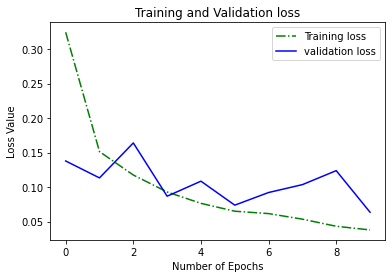

In [10]:
epochs = range(0, max_epochs)
# Using the max_epochs constant to create an iterable object of the range of epochs to generate valid X axes.

plt.plot(epochs, alexnet_history.history['loss'], 'g-.', label='Training loss')
plt.plot(epochs, alexnet_history.history['val_loss'], 'b', label='validation loss')

plt.title('Training and Validation loss')

plt.xlabel('Number of Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()

## **AlexNet Accuracy Graph Analysis**

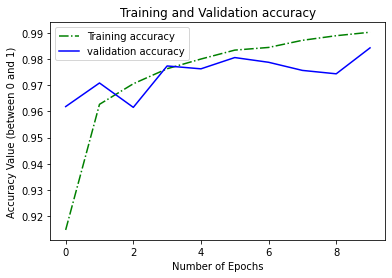

In [11]:
plt.plot(epochs, alexnet_history.history['accuracy'], 'g-.', label='Training accuracy')
plt.plot(epochs, alexnet_history.history['val_accuracy'], 'b', label='validation accuracy')

plt.title('Training and Validation accuracy')

plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy Value (between 0 and 1)')
plt.legend()

plt.show()

*Alexnet implementation complete and results shown.*

# **Recurrent Neural Network**


In [21]:
rnn_model = tf.keras.Sequential(
    [
        # 1st layer
        tf.keras.layers.LSTM(64, input_shape=(None, 28), return_sequences=True), # Matches the MNIST shape of 28x28
        tf.keras.layers.BatchNormalization(),

        # 2nd layer
        tf.keras.layers.LSTM(128, return_sequences=True),
        tf.keras.layers.BatchNormalization(),
        
        # 3rd Layer
        tf.keras.layers.LSTM(128, return_sequences=False),
        
        # Fully Connected Layer
        tf.keras.layers.Dense(10) # 0 to 9 Labels.
    ]
)
rnn_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, None, 64)          23808     
_________________________________________________________________
batch_normalization_14 (Batc (None, None, 64)          256       
_________________________________________________________________
lstm_8 (LSTM)                (None, None, 128)         98816     
_________________________________________________________________
batch_normalization_15 (Batc (None, None, 128)         512       
_________________________________________________________________
lstm_9 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 256,266
Trainable params: 255,882
Non-trainable params: 384
______________________________________________

In [ ]:
rnn_model.fit()